In [34]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [19]:
data_dir = r"C:\Users\kavi0\Downloads\archive (3)\flowers"
img_size = 128


In [20]:
X = []
y = []
labels = os.listdir(data_dir)


In [21]:
for idx, label in enumerate(labels):
    folder = os.path.join(data_dir, label)
    for file in os.listdir(folder):
        path = os.path.join(folder, file)
        try:
            img = cv2.imread(path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (img_size, img_size))
            X.append(img)
            y.append(idx)
        except:
            pass

In [22]:
X = np.array(X) / 255.0
y = to_categorical(y, num_classes=len(labels))

In [23]:
print("✅ Dataset loaded successfully!")
print("Total images:", X.shape[0])
print("Classes:", labels)

✅ Dataset loaded successfully!
Total images: 15740
Classes: ['astilbe', 'bellflower', 'black_eyed_susan', 'calendula', 'california_poppy', 'carnation', 'common_daisy', 'coreopsis', 'daffodil', 'dandelion', 'iris', 'magnolia', 'rose', 'sunflower', 'tulip', 'water_lily']


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
datagen = ImageDataGenerator(rotation_range=25,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True)


In [26]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(len(labels), activation='softmax')
])



In [27]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 128)     

In [ ]:
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    epochs=15,
                    validation_data=(X_test, y_test))

In [28]:
from tensorflow.keras.models import load_model

model = load_model(r"C:\7Th sem\Deep Learning\mini project\plant_name_detector.h5")

In [29]:
loss, acc = model.evaluate(X_test, y_test)
print(f"✅ Model Accuracy: {acc*100:.2f}%")

99/99 [==============================] - 14s 126ms/step - loss: 0.7434 - accuracy: 0.7503
✅ Model Accuracy: 75.03%


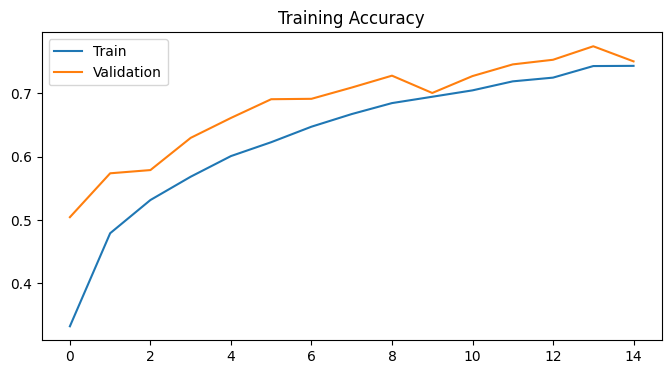

In [30]:
plt.figure(figsize=(8, 4))
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Training Accuracy')
plt.legend()
plt.show()

In [31]:
model.save("plant_name_detector.h5")
print("✅ Model saved as plant_name_detector.h5")

✅ Model saved as plant_name_detector.h5


1/1 [==============================] - 0s 318ms/step
🌿 Predicted Plant: water_lily


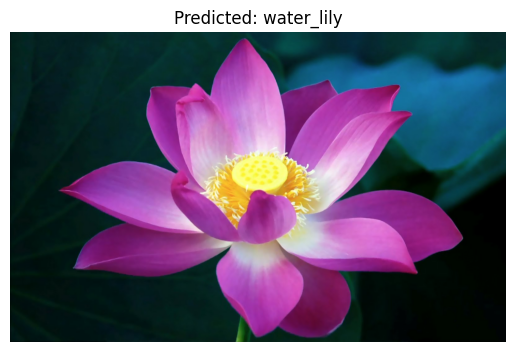

In [32]:
def predict_image(img_path):
    img = cv2.imread(img_path)
    if img is None:
        print(f"⚠️ Image not found at: {img_path}")
        return

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (img_size, img_size))
    img = np.expand_dims(img, axis=0) / 255.0

    prediction = np.argmax(model.predict(img))
    print("🌿 Predicted Plant:", labels[prediction])

    plt.imshow(cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB))
    plt.title(f"Predicted: {labels[prediction]}")
    plt.axis('off')
    plt.show()

# ✅ Now call the function like this:
predict_image(r"C:\Users\kavi0\Downloads\lily.jpeg")

